bunch는 마치 딕셔너리와 비슷하다

### 목표 : 당뇨병 예측 모델 구현
- 데이터 : scikit-learn dataset
- 피쳐 : 10
- 타겟 : 정수값

(1) 모듈 로딩 및 데이터 준비

In [94]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression     # linear regression
from sklearn.neighbors import KNeighborsRegressor       # KNN regression

In [95]:
## 데이터 로딩
diabetes = load_diabetes()

In [96]:
print(diabetes)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [97]:
featureArray = diabetes['data']
targetArray =diabetes['target']
feature_names=diabetes['feature_names']

In [98]:
featureArray.shape, targetArray.shape

((442, 10), (442,))

In [99]:
feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [100]:
featureArray

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [101]:
targetArray

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

### (1) 데이터 준비

In [102]:
diabetesDF = pd.read_csv('../data/diabetes.csv',index_col=0)
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 41.4 KB


In [103]:
diabetesDF.corr()['Y']

AGE    0.187889
SEX    0.043062
BMI    0.586450
BP     0.441482
S1     0.212022
S2     0.174054
S3    -0.394789
S4     0.430453
S5     0.565883
S6     0.382483
Y      1.000000
Name: Y, dtype: float64

In [104]:
# 데이터 준비
featureDF = diabetesDF[['BMI','S5']]
targetDF = diabetesDF['Y']

(3) 데이터 전처리 <hr>
- 결측치, 이상치, 중복값 처리
- 데이터 분포, 컬럼 분포, 최빈값, 고유값

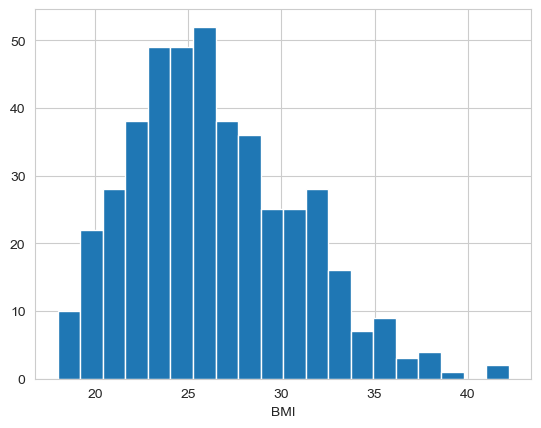

In [105]:
# 히스토그램으로 나타내기 - BMI
plt.hist(featureDF.BMI,bins=20)
plt.xlabel('BMI')
plt.show()

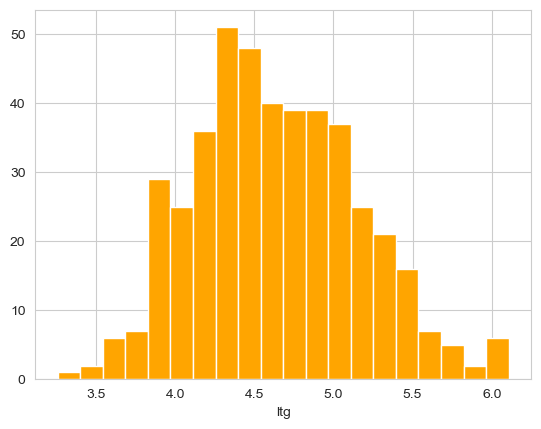

In [106]:
# 히스토그램으로 나타내기 - ltg
plt.hist(featureDF.S5,bins=20,color='orange')
plt.xlabel('ltg')
plt.show()

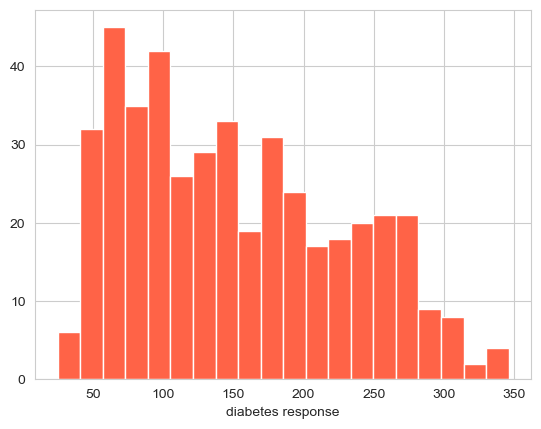

In [107]:
# 히스토그램으로 나타내기 - Y(target)
plt.hist(targetDF,color='tomato',bins=20)
plt.xlabel('diabetes response')
plt.show()

(4) 학습 진행 <hr>
- 학습 방법 : 지도학습 + 회귀(예측)    
        =>선형회귀 LinearRegression  
        => Knn Regressor(KNeighborsRegressor)

In [108]:
# 모듈로딩(7:3)
x_train, x_test, y_train, y_test = train_test_split(featureDF,targetDF,test_size=0.3,random_state=17)

In [109]:
# 모델 인스턴스 생성(1) : LinearRegression
model1 = LinearRegression()

# 학습
model1.fit(x_train,y_train)

LinearRegression()

In [110]:
# 학습 후 속성 확인
print(f'피쳐에 할당되는 가중치 계수 : {model1.coef_}')           # 가중치계수 .coef_
print(f'수식에 사용되는 절편 계수  : {model1.intercept_}')

피쳐에 할당되는 가중치 계수 : [ 6.83429674 60.93454799]
수식에 사용되는 절편 계수  : -312.1897471408578


In [111]:
# 모델 인스턴스 생성(2) : KNeighborsRegressor
model2 = KNeighborsRegressor()

# 학습
model2.fit(x_train,y_train)

KNeighborsRegressor()

(5) 테스트 <hr>

(5-1)LinearRegression 학습 테스트

In [112]:
# 결정계수 R2 : 학습, 테스트 결과 출력
print(model1.score(x_train,y_train), model1.score(x_test,y_test))

0.44848063537215144 0.48063650791645796


In [113]:
print(f'LinearRegression R2_score: {model1.score(x_test,y_test)}')

LinearRegression R2_score: 0.48063650791645796


(5-2)KNeighborsRegressor 학습 테스트

In [114]:
# 결정계수 R2 : 학습, 테스트 결과 출력
print(model2.score(x_train,y_train), model2.score(x_test,y_test))

0.581438441933221 0.3507253163438735


(5-2-1) 시각화

In [115]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
max_k = x_train.shape[0]
max_k

309

In [116]:
train_scoreList = []
test_scoreList = []

for k in range(1,max_k+1):
    model2 = KNeighborsRegressor(n_neighbors=k)
    model2.fit(x_train,y_train)
    
    train_scoreList.append(model2.score(x_train,y_train))
    test_scoreList.append(model2.score(x_test,y_test))

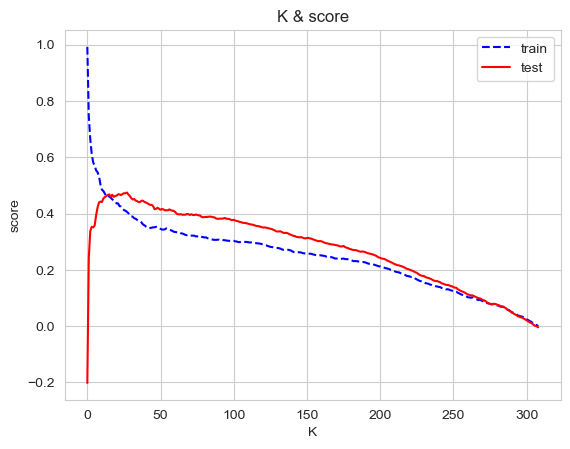

In [117]:
plt.plot(train_scoreList, 'b--',label='train')
plt.plot(test_scoreList, 'r-',label='test')
plt.title('K & score')
plt.xlabel('K')
plt.ylabel('score')
plt.legend()
plt.show()

In [118]:
test_scoreList.index(max(test_scoreList))

27

In [119]:
test_scoreList

[-0.20170862311229976,
 0.2410852620261259,
 0.337301038997015,
 0.35262516903510865,
 0.3507253163438735,
 0.35718399421771774,
 0.39316894838670635,
 0.4214010398537784,
 0.43944004697519357,
 0.4425661964514518,
 0.4407221296283059,
 0.45399848701046086,
 0.45836202177845076,
 0.46254835507010417,
 0.4659443579082003,
 0.4679084286039493,
 0.45900052636380484,
 0.4667367439193385,
 0.45887478611516574,
 0.46237714611353264,
 0.46359573140755816,
 0.4680363482728115,
 0.4681126798844002,
 0.46548690943732485,
 0.4688599832833621,
 0.4721222873891291,
 0.47174870216944,
 0.4746218970320686,
 0.46777904641254275,
 0.46222256513729476,
 0.45463704587659926,
 0.44982830274021623,
 0.45146952896445147,
 0.4459505154288843,
 0.444145789835253,
 0.44039142176121937,
 0.4409038140058186,
 0.4454820505891809,
 0.445331835530831,
 0.4412583465214065,
 0.4391147558113343,
 0.43645092107198225,
 0.4330588318705484,
 0.43045647237647255,
 0.4309943871549061,
 0.4254977685636474,
 0.41505917945637

(5-2-2) 스케일링 해볼까

In [120]:
# 모듈 로딩
from sklearn.preprocessing import StandardScaler

In [121]:
scaler = StandardScaler()
scaler.fit(x_train,y_train)

StandardScaler()

In [122]:
scaler.mean_

array([26.43398058,  4.6309657 ])

In [123]:
scaler.transform(x_train)


array([[ 0.74801639,  0.9980912 ],
       [ 0.08382942,  0.37000237],
       [ 2.07639032,  1.8317648 ],
       [ 1.41220336, -0.01165833],
       [-0.53455155, -0.43826627],
       [-0.48874555,  0.08175376],
       [-0.25971556,  0.25646173],
       [ 0.01512043, -0.95340073],
       [-0.87809653, -0.63877005],
       [ 0.28995641,  1.62754799],
       [ 0.38156841, -1.21878487],
       [-1.29035051, -1.08159808],
       [-0.90099953,  0.23965537],
       [-0.00778257,  0.53611174],
       [-0.21390956,  2.57886611],
       [ 0.08382942,  0.8059906 ],
       [ 1.18317337,  1.10909134],
       [-1.17583551, -0.39116938],
       [-0.19100656,  1.74812385],
       [ 0.08382942,  0.28948818],
       [-1.4048655 , -0.05035204],
       [ 2.35122631,  0.62112065],
       [-0.87809653, -1.21878487],
       [-0.69487254, -0.23463573],
       [-0.51164855, -0.36791407],
       [ 2.32832331,  2.14795887],
       [-1.01551452, -1.32841705],
       [ 0.42737441,  0.3059037 ],
       [-0.39713355,

In [124]:
# 학습용 데이터 피쳐 스케일링
scaled_x_train = scaler.transform(x_train)
scaled_x_train.shape

(309, 2)

In [125]:
# 테스트용 데이터 피쳐 스케일링
scaled_x_test=scaler.transform(x_test)
scaled_x_test.shape

(133, 2)

In [126]:
x_train

,BMI,S5
216,29.7,5.1417
180,26.8,4.8203
251,35.5,5.5683
328,32.6,4.6250
301,24.1,4.4067
...,...,...
406,18.9,4.0254
390,32.8,5.7746
143,26.9,4.1897
241,25.6,4.3175


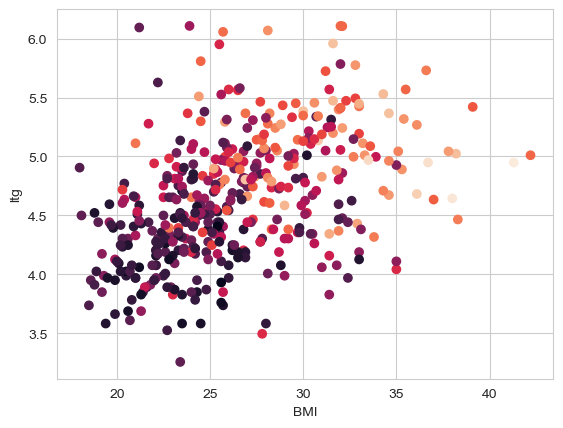

In [127]:
## => 원본 데이터 시각화
plt.scatter(featureDF.BMI, featureDF.S5, c=targetDF)
plt.xlabel('BMI')
plt.ylabel('ltg')
plt.show()

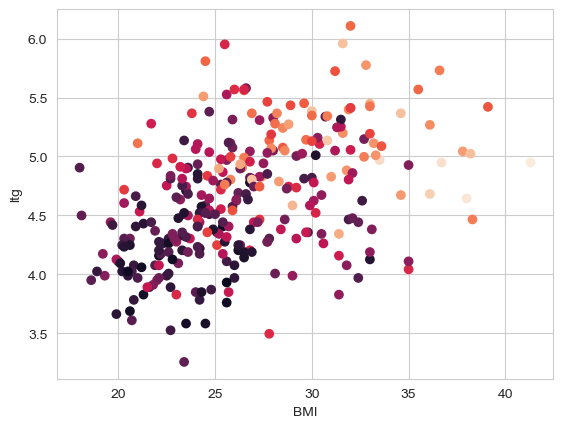

In [128]:
## => 훈련 데이터 시각화
plt.scatter(x_train.BMI, x_train.S5, c=y_train)
plt.xlabel('BMI')
plt.ylabel('ltg')
plt.show()

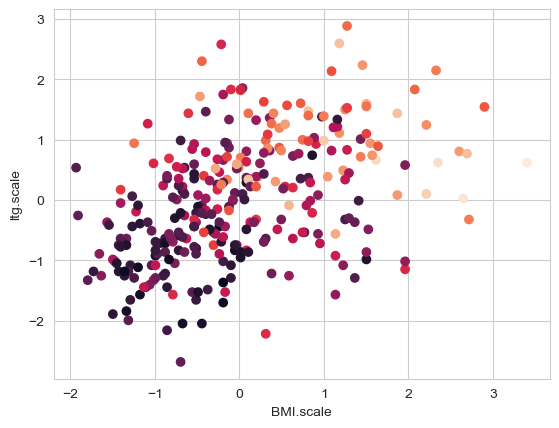

In [129]:
## => 스케일된 데이터 시각화 ==> scaled_x_train ndarray 타입
plt.scatter(scaled_x_train[:,0], scaled_x_train[:,1], c= y_train)
plt.xlabel('BMI.scale')
plt.ylabel('ltg.scale')
plt.show()

(5-2-2) 학습진행

In [130]:
max_k = scaled_x_train.shape[0]

test_scoreList = []
train_scoreList = []
for k in range(1,max_k+1):
    
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(scaled_x_train, y_train)
    
    train_scoreList.append(model.score(scaled_x_train, y_train))
    test_scoreList.append(model.score(scaled_x_test, y_test))

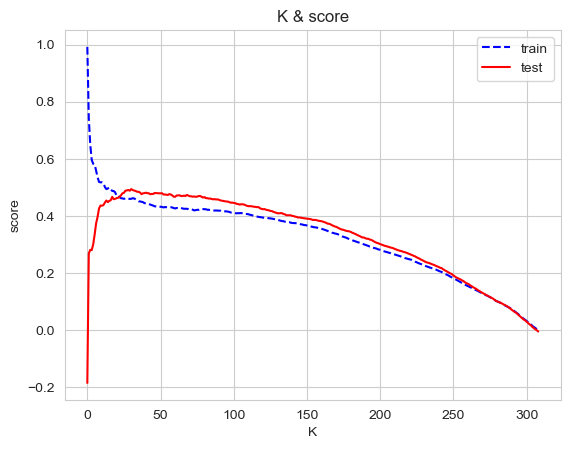

In [131]:
plt.plot(train_scoreList, 'b--',label='train')
plt.plot(test_scoreList, 'r-',label='test')
plt.title('K & score')
plt.xlabel('K')
plt.ylabel('score')
plt.legend()
plt.show()

(6) 성능평가

In [133]:
print(max(test_scoreList), max(train_scoreList))

0.4941705717016318 0.9916887938464564


In [134]:
test_scoreList.index(max(test_scoreList))

30

In [138]:
model_f = KNeighborsRegressor(n_neighbors=31)
model_f.fit(scaled_x_train, y_train)
y_pre = model_f.predict(scaled_x_test)
y_pre = np.round(y_pre, 1)

In [139]:
# # 결정 계수 값
r2 = r2_score(y_test, y_pre)

# 평균절대값오차
mae=mean_absolute_error(y_test, y_pre)

# 평균제곱오차 : 
mse = mean_squared_error(y_test, y_pre)

# 평균제곱오차제곱근 : RMSE => 1.4버전에 추가
rmse = mean_squared_error(y_test, y_pre, squared=False)

print(f'[모델설명도]\nR2: {r2}')
print(f'[에러]\nMAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

[모델설명도]
R2: 0.4941749501105759
[에러]
MAE: 43.51278195488722
MSE: 2878.3216541353386
RMSE: 53.64999211682457
